<a href="https://colab.research.google.com/github/viliturpeinen/Colabs/blob/main/TEHTAVA9_KOE27112025_PAATOKSENTEKOMALLIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peli (A,B):
Zero sum game with payoff matrices:

Row player:
[[ 2 -1 -2 -1]
 [-2 -1  1  2]
 [-1  0  2 -3]]

Column player:
[[-2  1  2  1]
 [ 2  1 -1 -2]
 [ 1  0 -2  3]]

Nashin tasapainot:
A:n strategia: [0.25  0.375 0.375]
B:n strategia: [0.125      0.70833333 0.         0.16666667]

Esimerkkistrategioiden (A,B) tuotto A:lle: -0.35


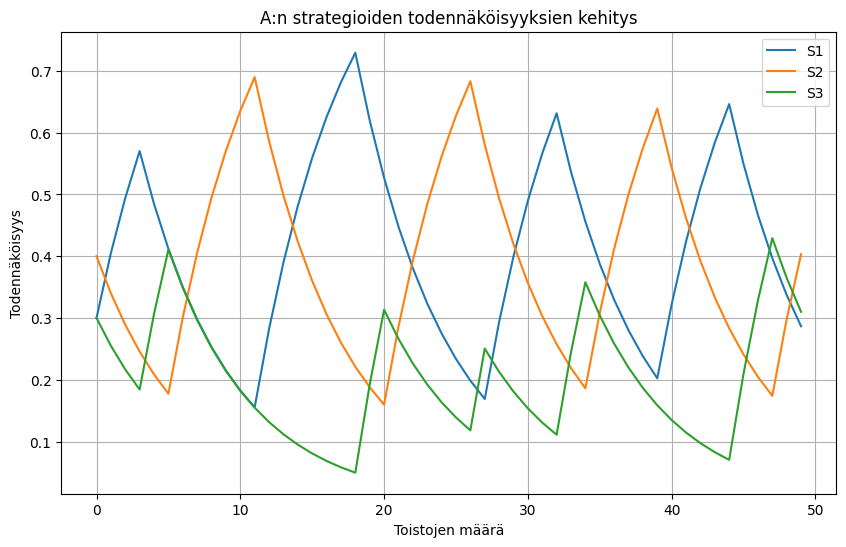

In [2]:
!pip install nashpy numpy matplotlib

import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Pelin määrittely
# -------------------------------

A_payoff = np.array([
    [ 2, -1, -2, -1],   # S1
    [-2, -1,  1,  2],   # S2
    [-1,  0,  2, -3]    # S3
])

B_payoff = -A_payoff   # nollasummapelissä B saa vastaluvun

game = nash.Game(A_payoff, B_payoff)
print("Peli (A,B):")
print(game)

# -------------------------------
# 2. Nashin tasapainon laskeminen
# -------------------------------

equilibria = list(game.support_enumeration())

print("\nNashin tasapainot:")
for eq in equilibria:
    print("A:n strategia:", eq[0])
    print("B:n strategia:", eq[1])

# -------------------------------
# 3. Valitse esimerkki-strategiat
# -------------------------------

# Esimerkki: A valitsee todennäköisyydet S1,S2,S3
pA = np.array([0.4, 0.3, 0.3])

# Esimerkki: B valitsee todennäköisyydet C1..C4
pB = np.array([0.25, 0.25, 0.25, 0.25])

# Lasketaan odotusarvo A:lle
expected_payoff_A = pA @ A_payoff @ pB.T
print("\nEsimerkkistrategioiden (A,B) tuotto A:lle:", expected_payoff_A)

# -------------------------------
# 4. Toistopeli – responssidynamiikan simulointi
# -------------------------------

num_iterations = 50
A_history = []
B_history = []

# Aloitus (satunnainen tai valitsemasi)
A_strategy = np.array([0.3,0.4,0.3])
B_strategy = np.array([0.4,0.2,0.2,0.2])

learning_rate = 0.15  # Määrittää suppenemisen nopeuden

for _ in range(num_iterations):
    A_history.append(A_strategy.copy())
    B_history.append(B_strategy.copy())

    # Parhaan vastastrategian laskenta
    A_best_response = np.argmax(A_payoff @ B_strategy)
    B_best_response = np.argmin(A_strategy @ A_payoff)

    # Päivitetään todennäköisyyksiä kohti best responsea
    A_strategy = (1-learning_rate)*A_strategy
    A_strategy[A_best_response] += learning_rate

    B_strategy = (1-learning_rate)*B_strategy
    B_strategy[B_best_response] += learning_rate

# -------------------------------
# 5. Piirretään kehitys (suppeneminen)
# -------------------------------

A_history = np.array(A_history)

plt.figure(figsize=(10,6))
plt.plot(A_history[:,0], label="S1")
plt.plot(A_history[:,1], label="S2")
plt.plot(A_history[:,2], label="S3")

plt.title("A:n strategioiden todennäköisyyksien kehitys")
plt.xlabel("Toistojen määrä")
plt.ylabel("Todennäköisyys")
plt.legend()
plt.grid(True)
plt.show()
